<a href="https://colab.research.google.com/github/aalr007/iayaa-Equipo-19/blob/main/ActividadSemanal6A01081266.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Maestría en Inteligencia Artificial Aplicada

Curso: Inteligencia Artificial y Aprendizaje Automático

***Tecnológico de Monterrey***

Prof Maria de la Paz Rico

Actividad de la Semana 6: Visualización

Aurelio Antonio Lozano Rábago A01081266


Este Ejercicio usa un Dataset que obtuvo los datos de los pagos de créditos de personas en Taiwan, buscando obtener si son sujetos de créditos o no
base de datos :https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv

Descripcion: https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/dataset_info.txt

1-Descarga los datosEnlaces a un sitio externo. y carga el dataset en tu libreta. Descripción aquí. 

In [178]:
import pandas as pd 
import numpy as np
import seaborn as sns  
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

import matplotlib.pyplot as plt 

path = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

Original_df = pd.read_csv(path,sep=",")
# analizamos los datos 
miDF = Original_df.copy()
# vemos los datos originales 
miDF

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


2-Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [179]:
miDF.shape

(30000, 25)

In [180]:
miDF.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [181]:
miDF.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [182]:
miDF.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [183]:
miDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

In [184]:
miDF.isna()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [185]:
miDF.isna().any()

ID     False
X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

3-Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [186]:
ndf = miDF.copy()
ndf

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [187]:
#borramos faltantes en 'X2', 'X3','X4','X5'
ndf.dropna(subset=['X2', 'X3','X4','X5'],inplace = True)
ndf

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


de las columnas 12 a la 23, vamos a rellenar los datos faltantes con la mediana

In [188]:
columns = ['X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']
for c in columns:
  ndf.loc[(ndf[c] == 0.0),c] = np.nan
  ndf[c].fillna(ndf[c].mean(), inplace=True)

ndf[columns].head()

,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,3913.0,3102.0,689.0,48433.252454,45659.404766,44897.288844,6862.198755,689.0,6523.168727,6137.663048,6179.939017,6855.04268
1,2682.0,1725.0,2682.0,3272.000000,3455.000000,3261.000000,6862.198755,1000.0,1000.000000,1000.000000,6179.939017,2000.00000
2,29239.0,14027.0,13559.0,14331.000000,14948.000000,15549.000000,1518.000000,1500.0,1000.000000,1000.000000,1000.000000,5000.00000
3,46990.0,48233.0,49291.0,28314.000000,28959.000000,29547.000000,2000.000000,2019.0,1200.000000,1100.000000,1069.000000,1000.00000
4,8617.0,5670.0,35835.0,20940.000000,19146.000000,19131.000000,2000.000000,36681.0,10000.000000,9000.000000,689.000000,679.00000


***Importante: estamos considerando que los valores de 0 en las columnas X6 a X11 es un valor valido, ya que el rango de las demas celdas van de -1 al 3***

In [189]:
ndf.isna().any()

ID     False
X1     False
X2     False
X3     False
X4     False
X5     False
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
X18    False
X19    False
X20    False
X21    False
X22    False
X23    False
Y       True
dtype: bool

4.Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [190]:
ndf.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29994.000000,29992.000000,29990.000000,29988.000000,...,29995.000000,29995.000000,29995.000000,29995.000000,2.999500e+04,29995.000000,29995.000000,29995.000000,29995.000000,29992.000000
mean,15001.959093,167475.235206,1.603734,1.853109,1.551859,35.484214,-0.016603,-0.133669,-0.166389,-0.220788,...,48433.252454,45659.404766,44897.288844,6862.198755,7.221060e+03,6523.168727,6137.663048,6179.939017,6855.042680,0.221192
std,8659.540589,129738.954175,0.489129,0.790328,0.521911,9.218024,1.123871,1.197303,1.196097,1.169201,...,62574.312245,59000.956989,57559.086901,16352.580604,2.287467e+04,17413.288296,15463.736682,15058.429527,17536.548199,0.415057
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,0.000000
25%,7503.500000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,8343.000000,8000.000000,7695.500000,1898.000000,1.787000e+03,1500.000000,1208.500000,1347.500000,1436.000000,0.000000
50%,15002.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,29104.000000,28324.000000,28834.000000,4000.000000,3.916000e+03,3538.000000,3500.000000,3645.000000,4000.000000,0.000000
75%,22500.500000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54509.000000,50178.000000,49200.500000,6862.198755,7.221060e+03,6523.168727,6137.663048,6179.939017,6855.042680,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


X1: Monto del crédito otorgado (dólar NT):
Otorgan credito en promedio de $167,475 USD con una desviacion de $129,738 (en general los créditos van de los $37,736. a $297,214 USD)

X2: Género (1 = masculino; 2 = femenino).
Hay mas mujeres ya que la media esta mas cargada al 2, la desviacion estandar de .5 hace sentido ya que es una variable binaria

X3: Educación (1 = posgrado; 2 = universidad; 3 = secundaria; 4 = otros).
la mayoria de los estudios estan rondando la universidad, ya que la media es 1.8 con una desviacion estandar de .79, hay que considerar que entre menos estudios, va a pesar en la media.

X4: Estado civil (1 = casado; 2 = soltero; 3 = otros).
hay una media de 1.5, con desviacion estandar de .52 por lo que esta muy repartido entre casados y solteros, tal vez el .05 extra cargado a los solteros se este dando por los otros.

X5: Edad (año).
el promedio de edad de los solicitantes ronda los 35 años, la mayoria se encuentra en el rango de los 26 a 44 años

X6 - X11: Historial de pagos pasados. Hicimos un seguimiento de los registros de pagos mensuales pasados ​​(de abril a septiembre de 2005) 



X12-X17: Importe del estado de cuenta (dólar NT).


X18-X23: Monto del pago anterior (dólar NT).



5. Realiza el conteo de las variables categóricas

In [191]:
CountX2 = ndf.groupby('X2').apply(len)
CountX3 = ndf.groupby('X3').apply(len)
CountX4 = ndf.groupby('X4').apply(len)
CountX5 = ndf.groupby('X5').apply(len)
CountX6 = ndf.groupby('X6').apply(len)
print(CountX2)
print(CountX3)
print(CountX4)
print(CountX5)
print(CountX6)

X2
1.0    11886
2.0    18109
dtype: int64
X3
0.0       14
1.0    10583
2.0    14029
3.0     4915
4.0      123
5.0      280
6.0       51
dtype: int64
X4
0.0       54
1.0    13656
2.0    15963
3.0      322
dtype: int64
X5
21.0      67
22.0     560
23.0     931
24.0    1127
25.0    1186
26.0    1256
27.0    1477
28.0    1409
29.0    1605
30.0    1395
31.0    1217
32.0    1158
33.0    1146
34.0    1162
35.0    1113
36.0    1108
37.0    1041
38.0     943
39.0     954
40.0     870
41.0     823
42.0     794
43.0     669
44.0     700
45.0     617
46.0     570
47.0     499
48.0     466
49.0     452
50.0     411
51.0     340
52.0     304
53.0     325
54.0     247
55.0     209
56.0     178
57.0     122
58.0     122
59.0      83
60.0      67
61.0      56
62.0      44
63.0      31
64.0      31
65.0      24
66.0      25
67.0      16
68.0       5
69.0      15
70.0      10
71.0       3
72.0       3
73.0       4
74.0       1
75.0       3
79.0       1
dtype: int64
X6
-2.0     2759
-1.0     5683
 0.0    

6. Escala los datos, si consideras necesario
7. Reduce las dimensiones con PCA, si consideras necesario

6 y 7 los vamos a hacer en un mismo paso, ya que PCA necesita los datos normalizados

In [192]:
#Antes de PCA vamos a remover el ID y la salida ya que no aportan
ndf.drop(['ID','Y'],axis=1, inplace=True)

In [193]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

pcs = PCA()
pcs.fit(preprocessing.scale(ndf.iloc[:,:].dropna(axis=0))) 
                # Standardize a dataset along any axis.
                # Center to the mean and component wise scale to unit variance.
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(3) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Standard deviation,2.470,2.081,1.260,1.225,1.013,0.979,0.959,0.948,0.939,0.888,...,0.726,0.635,0.530,0.514,0.439,0.367,0.292,0.229,0.195,0.182
Proportion of variance,0.265,0.188,0.069,0.065,0.045,0.042,0.040,0.039,0.038,0.034,...,0.023,0.018,0.012,0.011,0.008,0.006,0.004,0.002,0.002,0.001
Cumulative proportion,0.265,0.453,0.522,0.588,0.632,0.674,0.714,0.753,0.791,0.826,...,0.935,0.953,0.965,0.977,0.985,0.991,0.995,0.997,0.999,1.000


In [194]:
#Buscamos la relacion entre PCs y los headers de las columnas
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=ndf.columns
                                )
pcsComponents_df.iloc[:,:12]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
X1,0.095700,0.288174,0.085948,0.075672,-0.154742,-0.389822,0.119642,0.047744,0.028956,0.015158,0.012296,-0.182065
X2,-0.018918,0.032847,-0.016187,-0.083252,0.876384,-0.414393,0.043461,0.020979,-0.003043,0.035357,-0.002292,0.055722
X3,0.012428,-0.089358,-0.210642,0.344025,0.363664,0.557812,-0.388979,-0.031545,-0.143781,0.057653,-0.008167,-0.269018
X4,-0.011224,-0.040373,0.229125,-0.592427,-0.052285,0.278417,-0.145882,-0.008090,-0.042845,0.035239,-0.019843,-0.196581
X5,0.021872,0.061194,-0.225727,0.614737,-0.163177,-0.085765,0.082049,0.002929,0.048741,0.007220,-0.020965,-0.035511
X6,0.152884,-0.300802,0.003329,0.020389,-0.017811,0.010615,-0.095943,-0.013197,-0.045763,-0.005159,-0.011224,0.609533
X7,0.166783,-0.351834,0.046719,0.039569,-0.027778,-0.031986,-0.084289,-0.009108,-0.036570,-0.001075,-0.005724,0.358193
X8,0.168204,-0.364994,0.089859,0.049457,-0.019663,-0.063107,-0.019690,0.014035,-0.007544,-0.012986,-0.057459,0.083458
X9,0.171648,-0.369568,0.115490,0.058483,-0.009849,-0.097248,0.043204,0.031527,0.034979,-0.026816,0.010725,-0.209375
X10,0.174190,-0.359833,0.129491,0.054365,-0.002192,-0.105034,0.100561,0.018969,0.047484,0.043519,0.027279,-0.351797


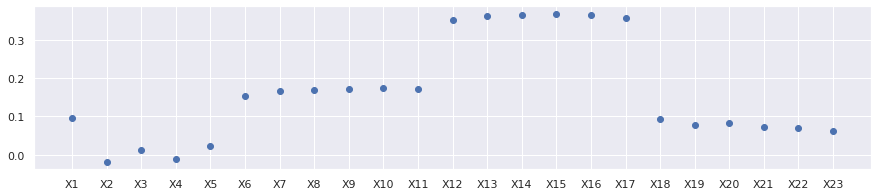

In [195]:
AxisX = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']
plt.figure(figsize=(15, 3))
plt.scatter(AxisX, pcsComponents_df.iloc[:,0])

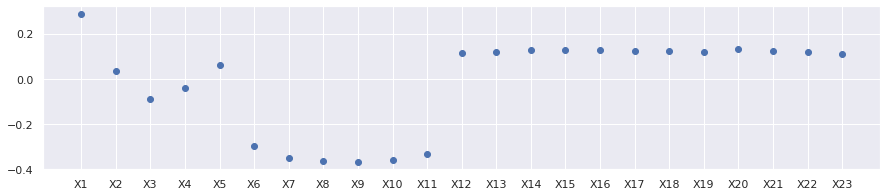

In [196]:
AxisX = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']
plt.figure(figsize=(15, 3))
plt.scatter(AxisX, pcsComponents_df.iloc[:,1])

Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%
Indica la importancia de las variables en cada componente

In [197]:
pcsSummary_df.round(3) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Standard deviation,2.470,2.081,1.260,1.225,1.013,0.979,0.959,0.948,0.939,0.888,...,0.726,0.635,0.530,0.514,0.439,0.367,0.292,0.229,0.195,0.182
Proportion of variance,0.265,0.188,0.069,0.065,0.045,0.042,0.040,0.039,0.038,0.034,...,0.023,0.018,0.012,0.011,0.008,0.006,0.004,0.002,0.002,0.001
Cumulative proportion,0.265,0.453,0.522,0.588,0.632,0.674,0.714,0.753,0.791,0.826,...,0.935,0.953,0.965,0.977,0.985,0.991,0.995,0.997,0.999,1.000


los primeros 7 componentes principales acumulan ya un 71% de la varianza, siendo X15 el que mas aporta, seguido de X9, X19,X5, X2, X19 y X22.

8. Elabora los histogramas de los atributos para visualizar su distribución

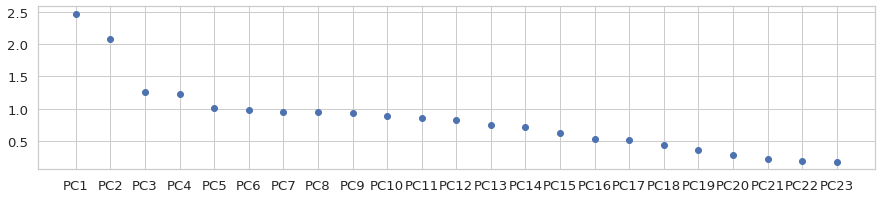

In [209]:
#graficamos la Desviacion Estandar
AxisPC = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23']
plt.figure(figsize=(15, 3))
plt.scatter(AxisPC, pcsSummary_df.iloc[0,:])

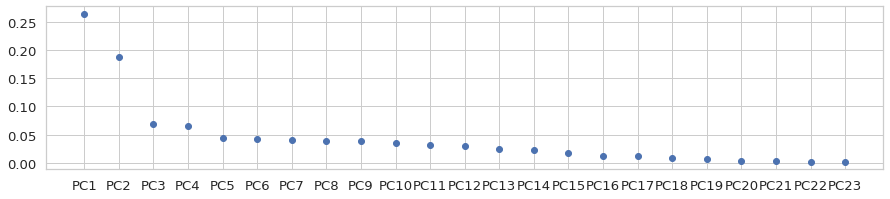

In [210]:
plt.figure(figsize=(15, 3))
plt.scatter(AxisPC, pcsSummary_df.iloc[1,:])

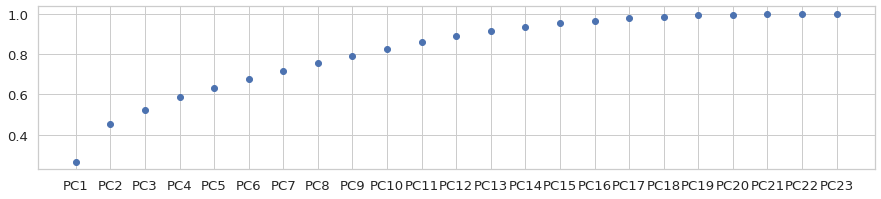

In [211]:
plt.figure(figsize=(15, 3))
plt.scatter(AxisPC, pcsSummary_df.iloc[2,:])

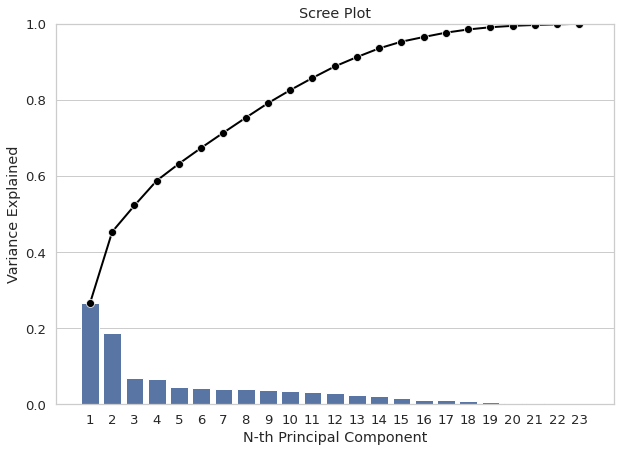

In [201]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8

                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

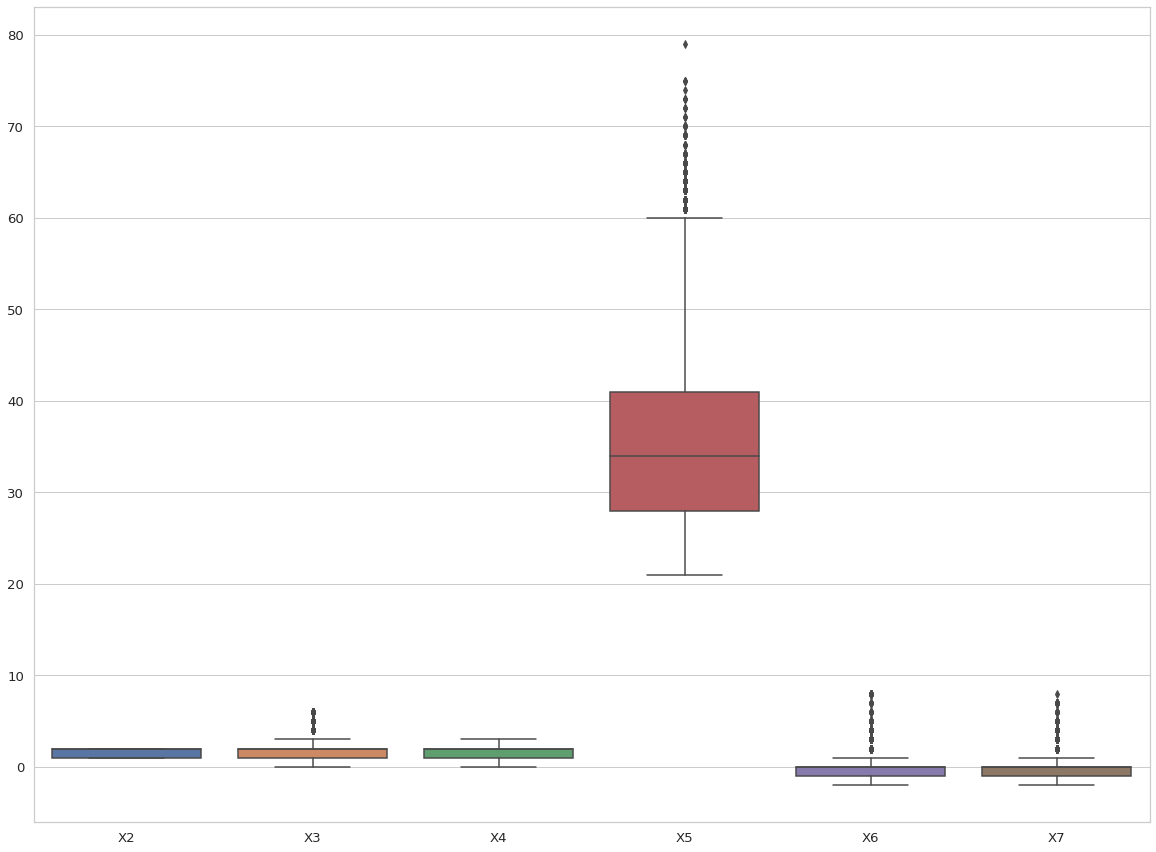

In [202]:
sns.boxplot(data=ndf[['X2',
    'X3',
    'X4',
    'X5',
    'X6',
    'X7',]], orient="v")

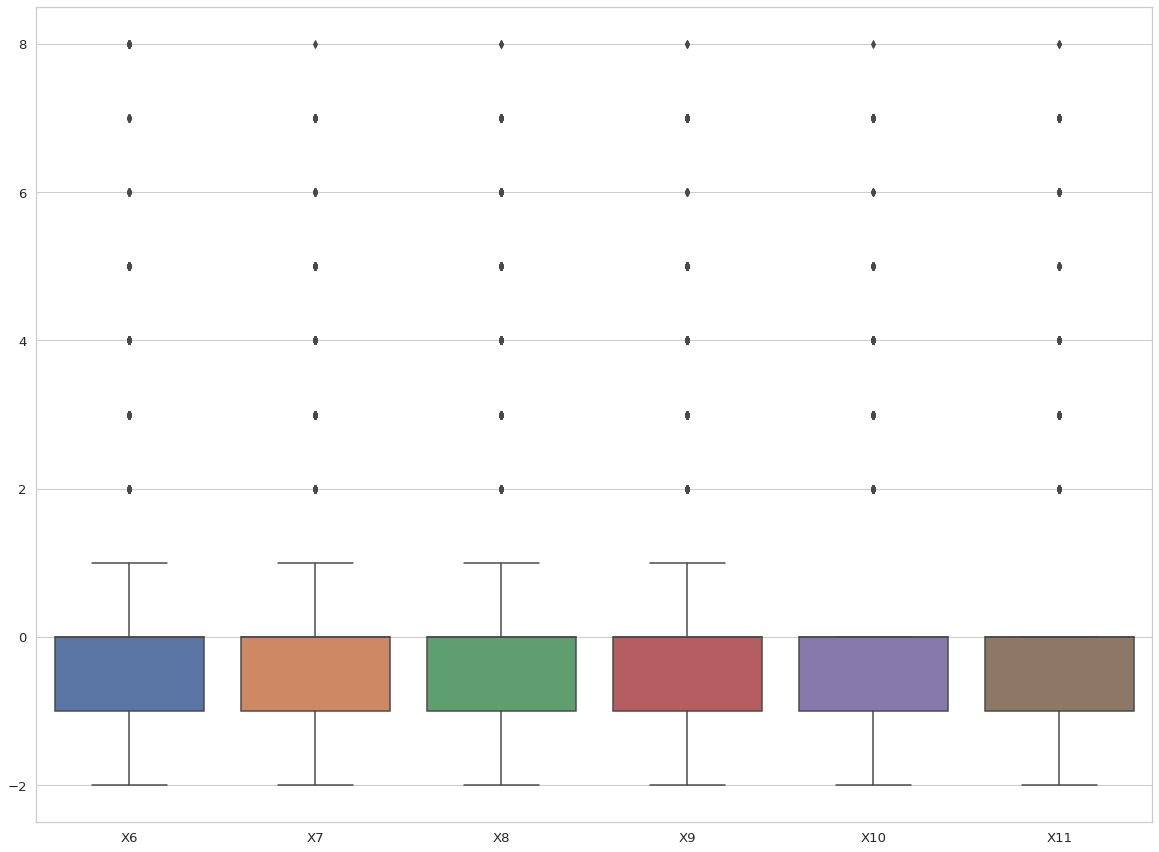

In [203]:
sns.boxplot(data=ndf[['X6',
    'X7',
    'X8',
    'X9',
    'X10',
    'X11',]], orient="v")

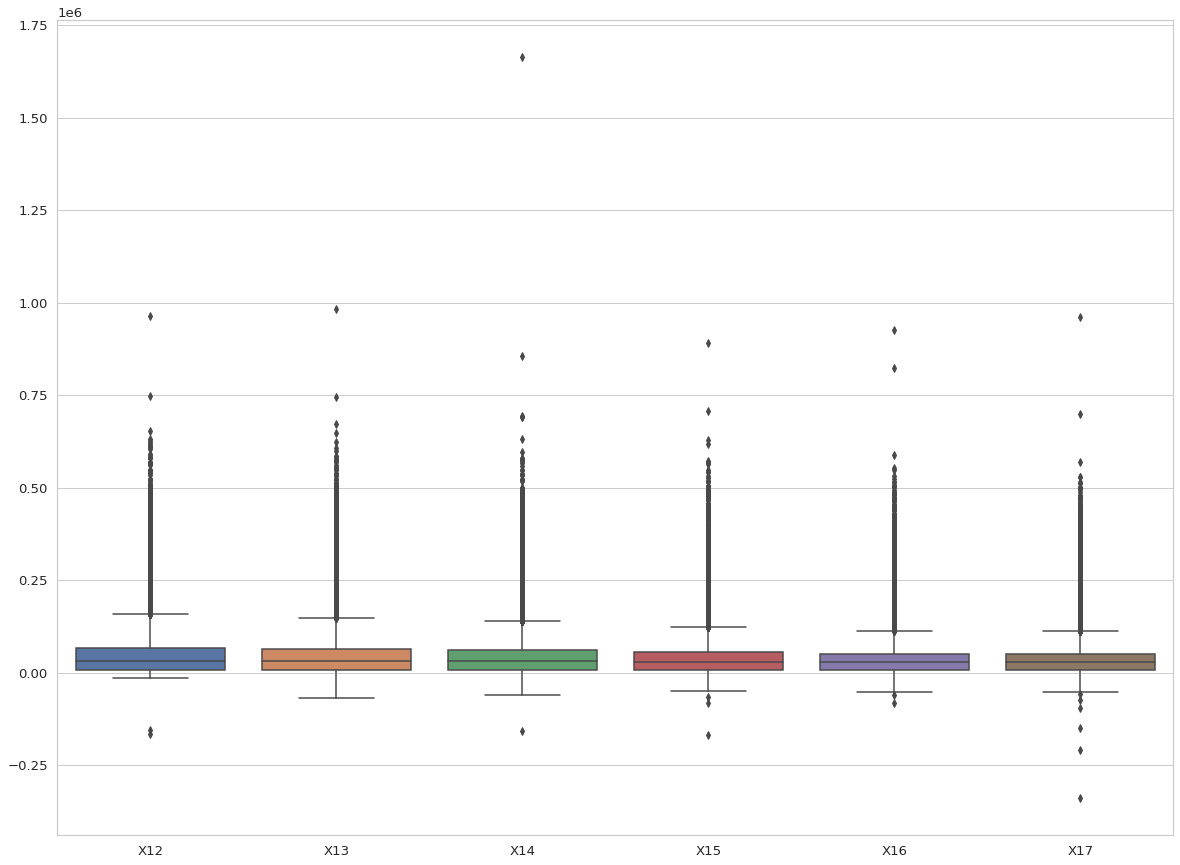

In [204]:
sns.boxplot(data=ndf[['X12',
    'X13',
    'X14',
    'X15',
    'X16',
    'X17',]], orient="v")

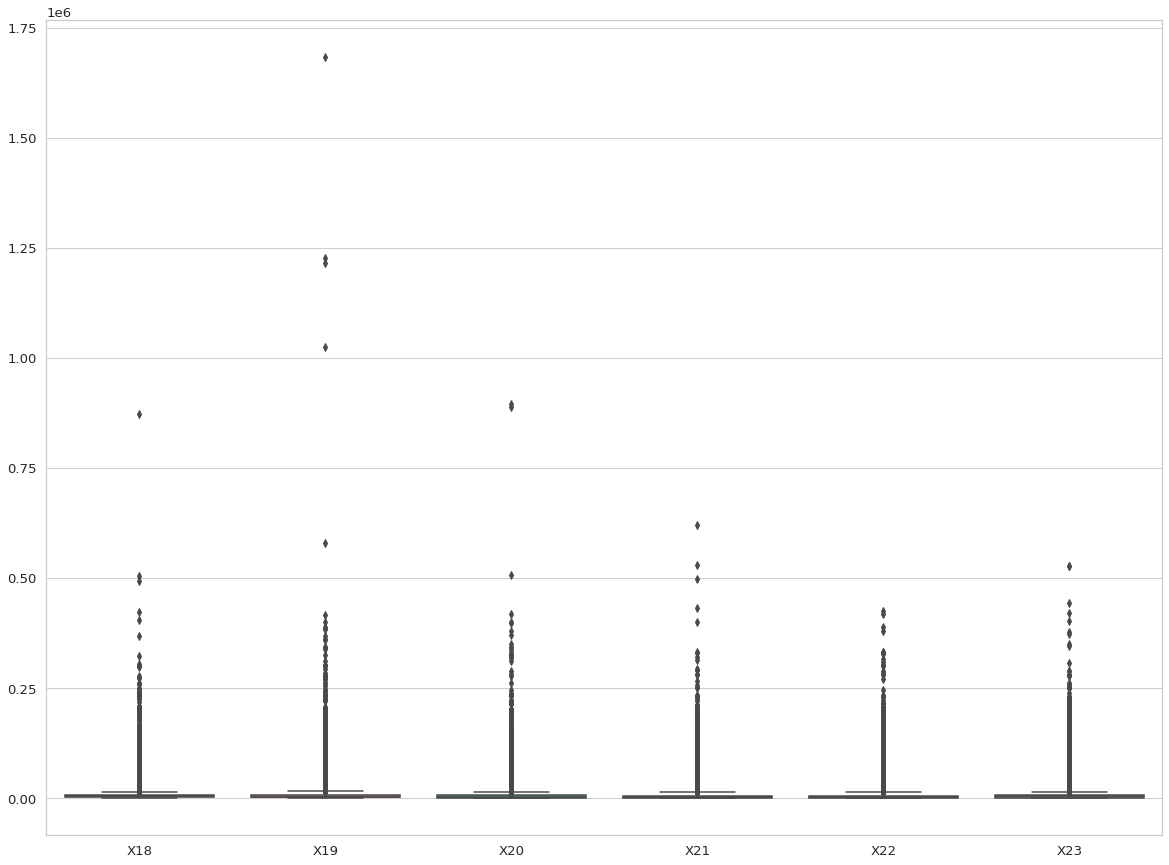

In [205]:
sns.boxplot(data=ndf[['X18',
    'X19',
    'X20',
    'X21',
    'X22',
    'X23',]], orient="v")

#codigo para tirar

In [206]:
df_CategoricalVar = ["X3","X4"]
df_CuantitativaDiscVar= ["X1""X12","X13","X14","X15","X16","X17","X18","X19","X20","X21","X22","X23"]
df_OrdinalcVar= ["X5","X6","X7","X8","X9","X10","X11"]
df_BinaryVar= ["X2"]

#pipeline variables Numericas
df_PipelineOrd= Pipeline(steps = [('ImpMediana', SimpleImputer(strategy='median')), ('scalar', MinMaxScaler(feature_range=(1,2)))])
columnas_PipelineOrd =df_OrdinalcVar

#pipeline variables categoricas
df_PipelineCate = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),('OneHotE', OneHotEncoder(handle_unknown="ignore"))])
columnas_df_PipelineCate = df_CategoricalVar


#pipeline variables binarias
df_PipelineBin = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),('OneHotE', OneHotEncoder(handle_unknown="ignore"))])
columnas_df_PipelineBin = df_BinaryVar

#pipeline variables Cuantitativas
df_PipelineCuant = Pipeline(steps = [('ImpMedia', SimpleImputer(strategy='mean')),('scalar', MinMaxScaler(feature_range=(1,2)))])
columnas_df_PipelineCuant = df_CuantitativaDiscVar

In [207]:
df_ColTransformadas = ColumnTransformer(transformers=[('Numericas', df_PipelineOrd, columnas_PipelineOrd), 
                                            ('Categoricas', df_PipelineCate , columnas_df_PipelineCate), 
                                            ('binarias', df_PipelineBin, columnas_df_PipelineBin), 
                                            ('Cuantitativa', df_PipelineCuant, columnas_df_PipelineCuant)], 
                                            remainder='passthrough')

In [208]:
df_ColTransformadas

ColumnTransformer(remainder='passthrough',
                  transformers=[('Numericas',
                                 Pipeline(steps=[('ImpMediana',
                                                  SimpleImputer(strategy='median')),
                                                 ('scalar',
                                                  MinMaxScaler(feature_range=(1,
                                                                              2)))]),
                                 ['X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']),
                                ('Categoricas',
                                 Pipeline(steps=[('impModa',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('OneHotE',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['X3', 'X4']),
                                ('binarias',
       